<a href="https://colab.research.google.com/github/MonirulIslamm08/Brain-Stock-Prediction/blob/main/Brain_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
train_df.shape

(15304, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [6]:
train_df.nunique()

,0
id,15304
gender,3
age,106
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3740
bmi,407


In [7]:
print(train_df['gender'].unique())
print(train_df['work_type'].unique())
print(train_df['Residence_type'].unique())
print(train_df['smoking_status'].unique())
print(train_df['ever_married'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['never smoked' 'formerly smoked' 'Unknown' 'smokes']
['Yes' 'No']


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<Axes: xlabel='count', ylabel='gender'>

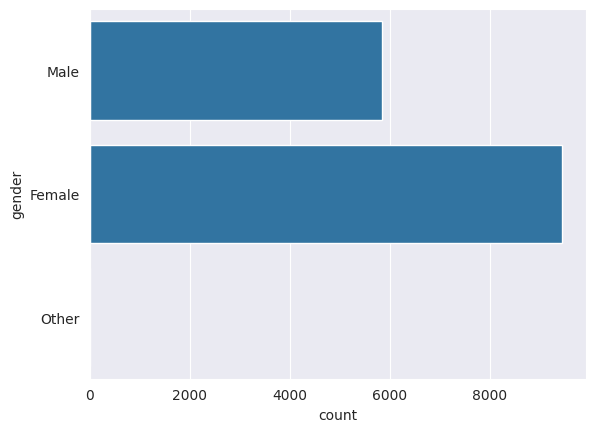

In [9]:
sns.countplot(train_df['gender'])


Text(0.5, 1.0, 'Stroke Distribution')

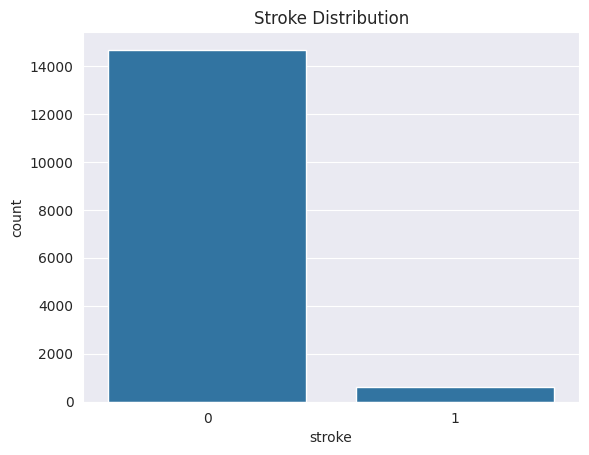

In [10]:
sns.countplot(x=train_df['stroke'])
plt.title("Stroke Distribution")

Text(0.5, 1.0, 'Age Distribution of Stroke Patients')

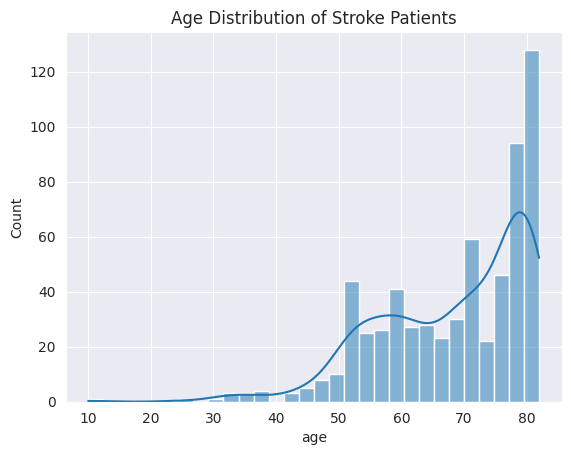

In [11]:
sns.histplot(train_df[train_df["stroke"] == 1]["age"], bins=30, kde=True)
plt.title("Age Distribution of Stroke Patients")

# Feature extraction

In [12]:
train_df.duplicated().sum()

np.int64(0)

# Age

In [13]:
sorted(train_df['age'].unique().tolist())[:15]

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.68,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16]

In [14]:
train_df['age'] = train_df['age'].astype(int)
test_df['age'] = test_df['age'].astype(int)

In [15]:
sorted(train_df['age'].unique().tolist())[:8]
sorted(train_df['age'].unique().tolist())[-8:]

[75, 76, 77, 78, 79, 80, 81, 82]

In [16]:
train_df['gender'].value_counts()

,count
gender,
Female,9446
Male,5857
Other,1


In [17]:
train_df.drop(train_df[train_df['gender'] == 'Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender'] == 'Other'].index, inplace=True)

In [18]:
train_df['gender'] = train_df['gender'].map({'Male': 0, 'Female': 1})
test_df['gender'] = test_df['gender'].map({'Male': 0, 'Female': 1})

# Bivariate Analysis

 Stroke vs. Smoking Status

([0, 1, 2, 3],
 [Text(0, 0, 'never smoked'),
  Text(1, 0, 'formerly smoked'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'smokes')])

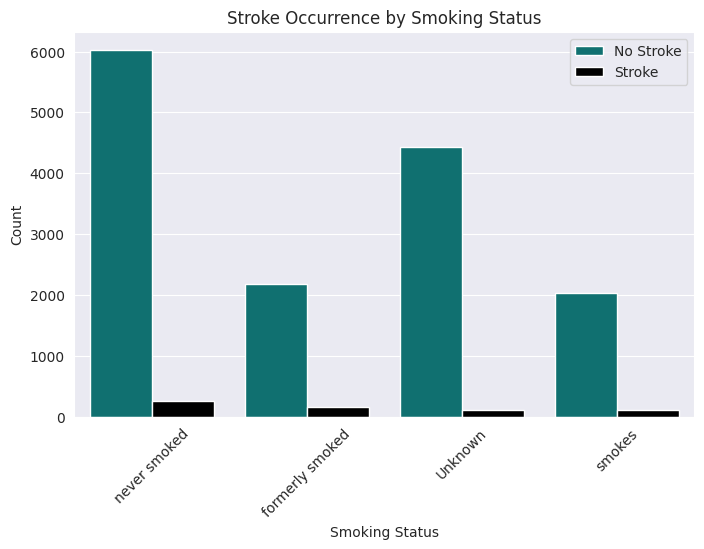

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='smoking_status', hue='stroke', palette=['#008080', 'black'])
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=45)

 Age Distribution by Stroke

<ipython-input-20-69c7efb20d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df,x='stroke', y='age', palette=['#008080', 'black'])


Text(0, 0.5, 'Age')

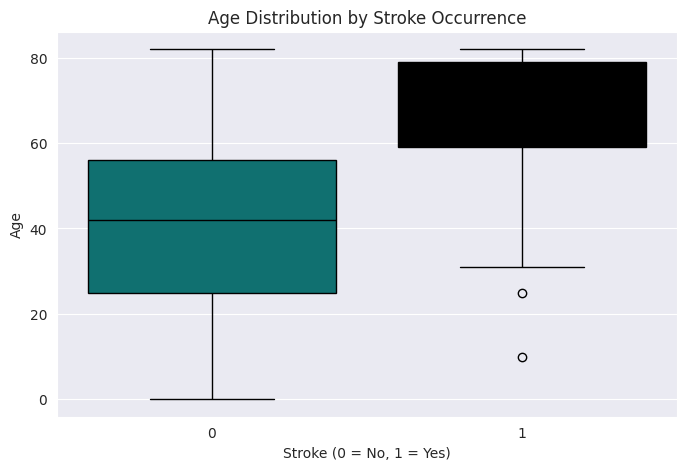

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df,x='stroke', y='age', palette=['#008080', 'black'])
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')


 Age vs. BMI for Stroke Patients

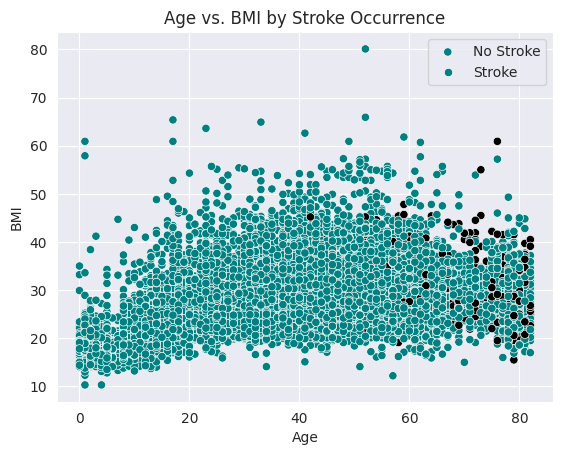

In [21]:
sns.scatterplot(data=train_df, x='age', y='bmi', hue='stroke', palette=['#008080', 'black'])
plt.title('Age vs. BMI by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(['No Stroke', 'Stroke'])

Text(0.5, 1.0, 'Feature Correlation Heatmap')

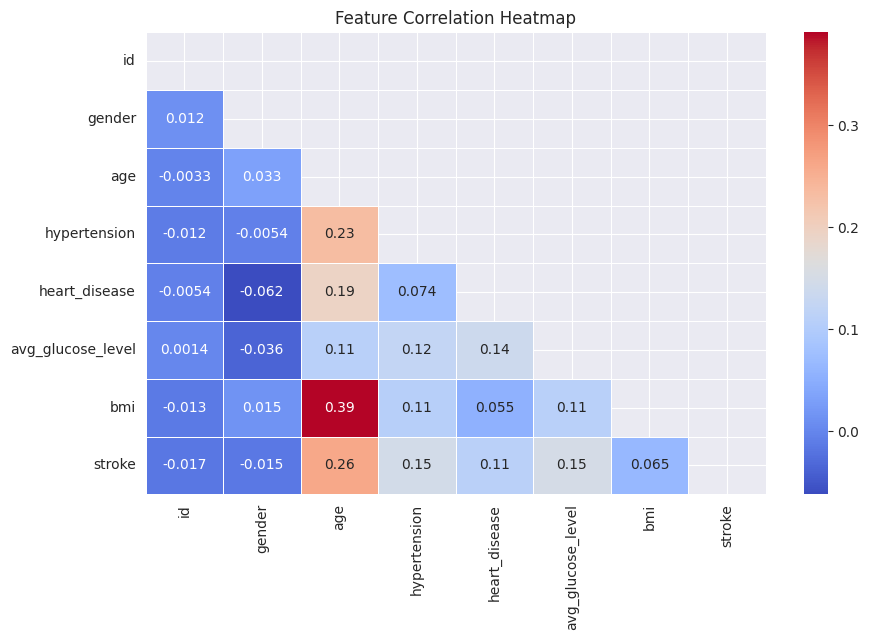

In [22]:
plt.figure(figsize=(10, 6))
corr = train_df.corr(numeric_only=True)  # Only for numerical columns
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

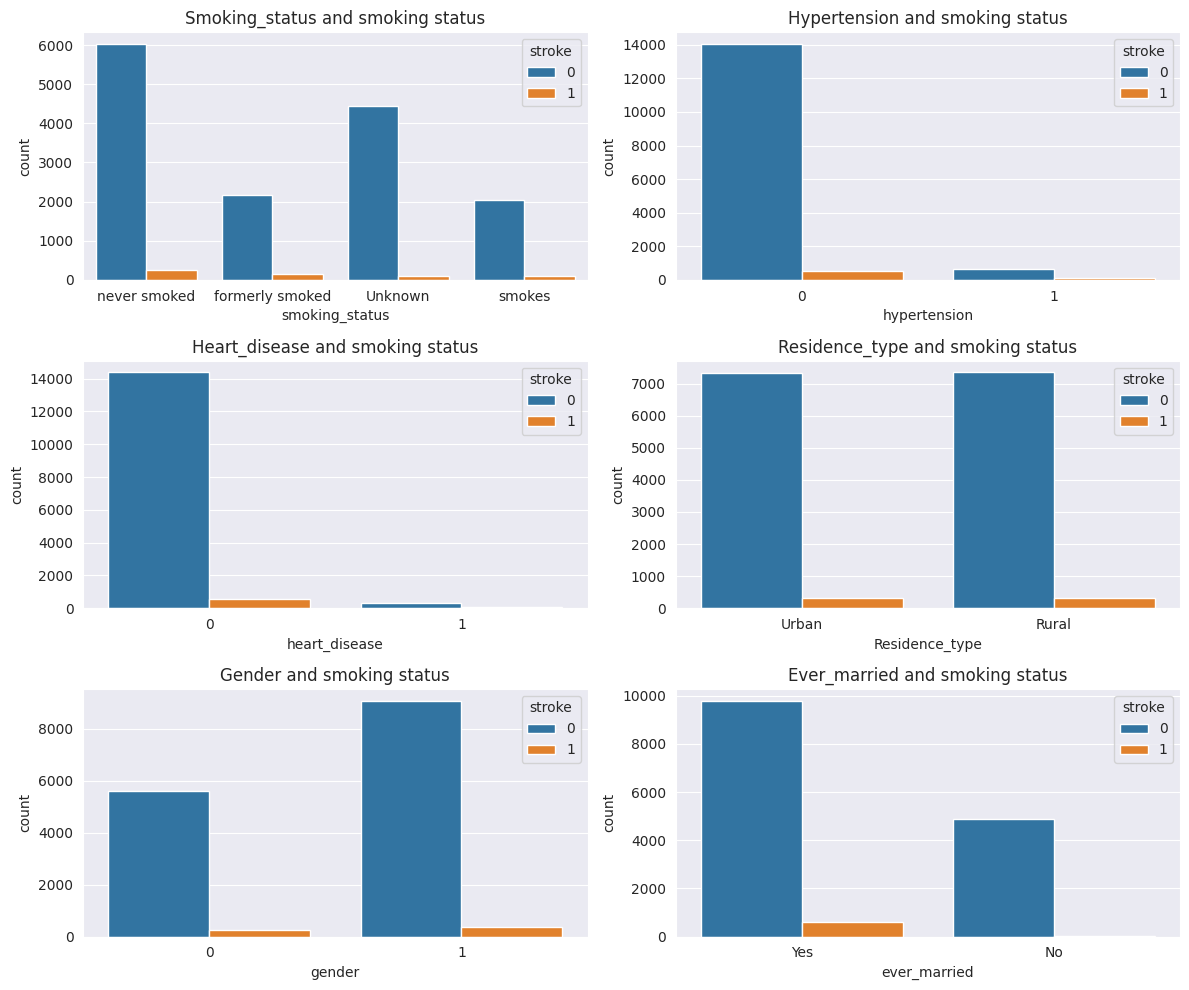

In [23]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15303 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15303 non-null  int64  
 1   gender             15303 non-null  int64  
 2   age                15303 non-null  int64  
 3   hypertension       15303 non-null  int64  
 4   heart_disease      15303 non-null  int64  
 5   ever_married       15303 non-null  object 
 6   work_type          15303 non-null  object 
 7   Residence_type     15303 non-null  object 
 8   avg_glucose_level  15303 non-null  float64
 9   bmi                15303 non-null  float64
 10  smoking_status     15303 non-null  object 
 11  stroke             15303 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.5+ MB


# Data Preparation & preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display='diagram')

Creating Input and Target Data

In [27]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'stroke'

In [28]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [29]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [30]:
numeric_cols = train_inputs.select_dtypes(include=['int64', 'float64']).columns

In [31]:
numeric_cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')

In [32]:
categorical_cols = train_inputs.select_dtypes(include=['object']).columns

In [33]:
categorical_cols

Index(['ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype='object')

In [34]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [35]:
ordinal_encoder = OrdinalEncoder(categories=[['never smoked', 'Unknown', 'formerly smoked', 'smokes']])

In [36]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [37]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('ordinal_encoder', ordinal_encoder, ['smoking_status']),
    ('onehot_encoder', onehot_encoder, categorical_cols)
], remainder='passthrough')  # Keep numerical columns as is

In [38]:
# Fit and transform training data
X_train_encoded = preprocessor.fit_transform(train_inputs)
X_test_encoded = preprocessor.transform(test_inputs)

In [39]:
# Get encoded column names
encoded_cols = preprocessor.get_feature_names_out()

In [40]:
# Convert transformed arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_encoded, columns=encoded_cols)

X_test = pd.DataFrame(X_test_encoded, columns=encoded_cols)

In [41]:
# Add target column back for training data
y_train = train_targets.copy()

In [42]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [43]:
# Verify shapes of transformed datasets
print(X_train.shape, X_test.shape)

(15303, 20) (10203, 20)


In [44]:
preprocessor.fit(train_inputs)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder',
                                 OrdinalEncoder(categories=[['never smoked',
                                                             'Unknown',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('onehot_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype='object'))])

In [45]:
encoded_cols = list(preprocessor.get_feature_names_out())
encoded_cols

['ordinal_encoder__smoking_status',
 'onehot_encoder__ever_married_No',
 'onehot_encoder__ever_married_Yes',
 'onehot_encoder__work_type_Govt_job',
 'onehot_encoder__work_type_Never_worked',
 'onehot_encoder__work_type_Private',
 'onehot_encoder__work_type_Self-employed',
 'onehot_encoder__work_type_children',
 'onehot_encoder__Residence_type_Rural',
 'onehot_encoder__Residence_type_Urban',
 'onehot_encoder__smoking_status_Unknown',
 'onehot_encoder__smoking_status_formerly smoked',
 'onehot_encoder__smoking_status_never smoked',
 'onehot_encoder__smoking_status_smokes',
 'remainder__gender',
 'remainder__age',
 'remainder__hypertension',
 'remainder__heart_disease',
 'remainder__avg_glucose_level',
 'remainder__bmi']

In [46]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [47]:
X_train = train_inputs[numeric_cols.tolist() + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numeric_cols.tolist() + encoded_cols]

In [48]:
X_train

,ordinal_encoder__smoking_status,onehot_encoder__ever_married_No,onehot_encoder__ever_married_Yes,onehot_encoder__work_type_Govt_job,onehot_encoder__work_type_Never_worked,onehot_encoder__work_type_Private,onehot_encoder__work_type_Self-employed,onehot_encoder__work_type_children,onehot_encoder__Residence_type_Rural,onehot_encoder__Residence_type_Urban,...,onehot_encoder__smoking_status_Unknown,onehot_encoder__smoking_status_formerly smoked,onehot_encoder__smoking_status_never smoked,onehot_encoder__smoking_status_smokes,remainder__gender,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,28.0,0.0,0.0,79.53,31.1
1,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,33.0,0.0,0.0,78.44,23.9
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,103.00,40.3
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,56.0,0.0,0.0,64.87,28.8
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,24.0,0.0,0.0,73.36,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,22.0,0.0,0.0,72.63,19.5
15300,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,46.0,1.0,0.0,101.19,32.1
15301,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,75.0,0.0,0.0,87.69,26.2
15302,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,101.13,22.5


In [49]:
X_train.shape[1] == X_test.shape[1]

True

# Splitting Data into Train & Test Sets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(12242, 40)

# Model Training & Evaluation

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

In [53]:
# Initialize models

models = [
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (SVC(), 'SVC'),
    (MLPClassifier(), 'MLPClassifier')
]

In [54]:

def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1


In [55]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)

    return model_metrics

In [56]:

predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. 

In [57]:
predictions = pd.concat(predictions, ignore_index=True)
predictions

,Model,Accuarcy,Precision,Recall,F1
0,LogisticRegression,0.954263,0.250000,0.022388,0.041096
1,RandomForestClassifier,0.953283,0.333333,0.067164,0.111801
2,SVC,0.956223,0.000000,0.000000,0.000000
3,MLPClassifier,0.956223,0.000000,0.000000,0.000000


Apply Smote

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [60]:
X_train_ns.shape

(23488, 40)

In [61]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_metrics = metric_df(lr_with_smote, 'SVC')
predictions = pd.concat([predictions, lr_with_smote_metrics], ignore_index=True)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
for model_name , confusion_mat in confusion_mats.items():
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_mat)
    print("\n")

Confusion Matrix for LogisticRegression:
[[2918    9]
 [ 131    3]]


Confusion Matrix for RandomForestClassifier:
[[2909   18]
 [ 125    9]]


Confusion Matrix for SVC:
[[2332  595]
 [  23  111]]


Confusion Matrix for MLPClassifier:
[[2927    0]
 [ 134    0]]




Voting Classifier

In [63]:
from sklearn.ensemble import VotingClassifier

In [64]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())),
estimator.append(('RandomForestClassifier', RandomForestClassifier())),
estimator.append(('SVC', SVC(probability=True))),
estimator.append(('MLPClassifier', MLPClassifier()))

In [65]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions = pd.concat([predictions, VC_hard_mat], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
VC_Soft = VotingClassifier(estimators=estimator, voting='soft')
VC_Soft.fit(X_train, y_train)
VC_Soft_mat = metric_df(VC_Soft, 'VC_Soft')
predictions = pd.concat([predictions, VC_Soft_mat], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
VC_Soft

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('SVC', SVC(probability=True)),
                             ('MLPClassifier', MLPClassifier())],
                 voting='soft')

In [68]:
VC_Soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_Soft,0.95655,0.666667,0.014925,0.029197


In [69]:
prediction_base = pd.concat([predictions], ignore_index=True, axis=1,sort=False)
prediction_base = prediction_base.T

prediction_base

,0,1,2,3,4,5,6
0,LogisticRegression,RandomForestClassifier,SVC,MLPClassifier,SVC,VC_HARD,VC_Soft
1,0.954263,0.953283,0.956223,0.956223,0.798105,0.955897,0.95655
2,0.25,0.333333,0.0,0.0,0.157224,0.333333,0.666667
3,0.022388,0.067164,0.0,0.0,0.828358,0.007463,0.014925
4,0.041096,0.111801,0.0,0.0,0.264286,0.014599,0.029197


In [72]:
model_to_plot = [
    'LogisticRegression',
    'RandomForestClassifier',
    'SVC',
    'MLPClassifier',
    'LogisticRegression_with_smote',
    'VC_HARD',
    'VC_Soft'
]

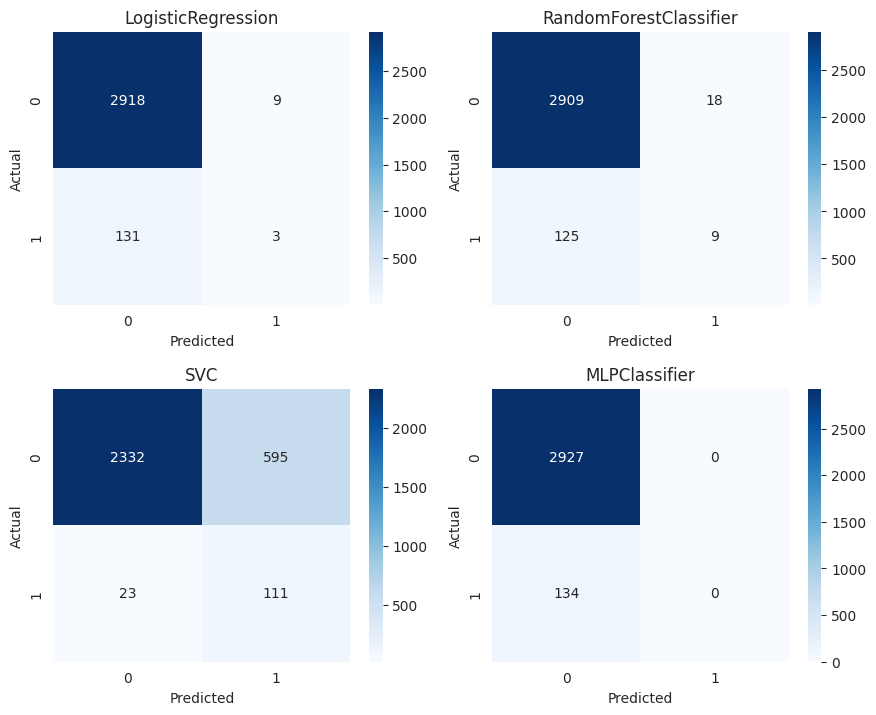

In [73]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), model_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

ROC & calculate AUC

In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import PredictionErrorDisplay

In [75]:
# Retain & save model
X_train = train_inputs[numeric_cols.tolist() + encoded_cols]
y_train = train_df[target_col]

In [76]:
preds = lr_with_smote.predict(X_test)

In [77]:
preds

array([0, 1, 0, ..., 0, 0, 0])

In [78]:
sub_df = preds

In [79]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [80]:
sub_df = pd.read_csv("submission.csv")

In [81]:

sub_df.head()

,0
0,0
1,1
2,0
3,1
4,0


In [82]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [83]:
sub_df

,0,stroke
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [84]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [93]:

single_input = {
    'gender': '1',
    'age': 33,
    'hypertension':0,
    'heart_disease': 0,
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [94]:
input_df = pd.DataFrame([single_input])

In [95]:
# Encoding categorical variables
#gender_map = {'Male': 0, 'Female': 1}
#ever_married_map = {'No': 0, 'Yes': 1}
#residence_map = {'Rural': 0, 'Urban': 1}
#work_type_map = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
#smoking_status_map = {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}

In [96]:
#input_df['gender'] = input_df['gender'].map(gender_map)
#input_df['ever_married'] = input_df['ever_married'].map(ever_married_map)
#input_df['Residence_type'] = input_df['Residence_type'].map(residence_map)
#input_df['work_type'] = input_df['work_type'].map(work_type_map)
#input_df['smoking_status'] = input_df['smoking_status'].map(smoking_status_map)

In [97]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [98]:
X = input_df[numeric_cols.tolist() + encoded_cols]

In [99]:
prediction = lr_with_smote.predict(X)

In [100]:
prediction

array([0])

# Save the model

In [101]:
import joblib

In [117]:
original_numeric_cols = ["age", "avg_glucose_level", "bmi"]  # or use inference

model = {
    'encoded_cols': list(X_train.columns),
    'numeric_cols': ["gender", "hypertension", "heart_disease"] + original_numeric_cols,
    'preprocessor': preprocessor,
    'scaler': scaler,
    'model': lr_with_smote
}


In [118]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [111]:
import sklearn

In [112]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)


2.0.2
2.2.2
0.13.2
1.6.1


In [113]:
print(model.keys())  # Check available keys


dict_keys(['encoded_cols', 'numeric_cols', 'preprocessor', 'scaler', 'model'])


In [114]:
numeric_cols.tolist()

['ordinal_encoder__smoking_status',
 'onehot_encoder__ever_married_No',
 'onehot_encoder__ever_married_Yes',
 'onehot_encoder__work_type_Govt_job',
 'onehot_encoder__work_type_Never_worked',
 'onehot_encoder__work_type_Private',
 'onehot_encoder__work_type_Self-employed',
 'onehot_encoder__work_type_children',
 'onehot_encoder__Residence_type_Rural',
 'onehot_encoder__Residence_type_Urban',
 'onehot_encoder__smoking_status_Unknown',
 'onehot_encoder__smoking_status_formerly smoked',
 'onehot_encoder__smoking_status_never smoked',
 'onehot_encoder__smoking_status_smokes',
 'remainder__gender',
 'remainder__age',
 'remainder__hypertension',
 'remainder__heart_disease',
 'remainder__avg_glucose_level',
 'remainder__bmi']

In [116]:
# Assuming 'train_inputs' holds the original preprocessed data:
transformed_data = preprocessor.transform(train_inputs)  # Apply preprocessing steps

# Now create the DataFrame using 'transformed_data'
X_train = pd.DataFrame(transformed_data, columns=encoded_cols)
X_train[["remainder__age", "remainder__avg_glucose_level", "remainder__bmi"]] = scaler.fit_transform(X_train[["remainder__age", "remainder__avg_glucose_level", "remainder__bmi"]]) # Fit and transform numerical features